# Connect to G-Drive

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Change Notebook Default Directory

In [3]:
import os
file_dir = "/content/drive/MyDrive/tugas digital skola/LaptopPrice2"
os.chdir(file_dir)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls

'[Complete]Laptop_Price.csv'


# Import Libraries

In [6]:
# Data Analysis Libraries
import pandas as pd
import numpy as np

# Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes",
       labelweight="bold",
       labelsize="large",
       titleweight="bold",
       titlesize=14,
       titlepad=10
)

# RegEx
import regex as re

<ipython-input-6-21f15e5228a1>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Figure size 640x480 with 0 Axes>

# Load Dataset

In [7]:
csv_filename = "[Complete]Laptop_Price.csv"
df = pd.read_csv(csv_filename)

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## DataFrame's Info

In [8]:
# DataFrame shape
df.shape

(1303, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Observations:

*  Terdapat 13 kolom pada Dataframe dan 1303 baris
*  Terdapat 3 jenis data type yaitu 10 data bertipe String, 1 data bertipe Integer, dan 2 data bertipe Float






## Describe Dataframe

In [10]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


Using the '**describe**' method of the dataframe, we can get some first insights on the numerical columns.

Observations:

* Panjang layar inch terpanjang pada brand laptop yaitu 18,4 inh

* Laptop_ID start dari 1 sampai 1320
* Harga Tertinggi Laptop sebesar 6099

# Data Cleaning

## Lowering DataFrame's Column Names

In [11]:
df = df.rename(columns=str.lower)
df.head()

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [12]:
df = df.rename(columns={'price_euros': 'price'})
df.head()

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Check Missing Values

In [13]:
df.isnull().sum()

laptop_id           0
company             0
product             0
typename            0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
opsys               0
weight              0
price               0
dtype: int64

## Check For Duplicates

In [14]:
df[df.duplicated()]

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price


# Data Cleaning + Feature Engineering (FE)

## Laptop ID

In [15]:
idx = 0
for laptop_id in df['laptop_id']:
  if idx+1 != laptop_id:
    print(laptop_id)
    break
  idx += 1

66


## Screen Resolution

In [16]:
df['resolution'] = df['screenresolution'].str.extract(r'(\d+x\d+)')
df['resolution']

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: resolution, Length: 1303, dtype: object

In [17]:
df['screentype'] = df['screenresolution'].replace(r'(\d+x\d+)', '', regex=True)
df['screentype'] = df['screentype'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','',regex=True)
df['screentype']

0       IPS Panel Retina Display 
1                                
2                                
3       IPS Panel Retina Display 
4       IPS Panel Retina Display 
                  ...            
1298     IPS Panel   Touchscreen 
1299     IPS Panel   Touchscreen 
1300                             
1301                             
1302                             
Name: screentype, Length: 1303, dtype: object

### FE on Screen Resolution

In [18]:
df['touchscreen'] = df['screentype'].str.extract(r'(Touchscreen)')
df['screentype']  = df['screentype'].replace(r'(Touchscreen)','', regex=True)

In [19]:
df['touchscreen'].value_counts()

Touchscreen    192
Name: touchscreen, dtype: int64

In [20]:
df['touchscreen'] = df['touchscreen'].replace('Touchscreen', 1)
df['touchscreen'] = df['touchscreen'].replace(np.nan, 0)

In [21]:
df['touchscreen'].value_counts()

0.0    1111
1.0     192
Name: touchscreen, dtype: int64

In [22]:
df.loc[df['screentype'] == '', ['screentype']]
# df.loc[df['screentype'] == ' ', ['screentype']]
# df.loc[df['screentype'] == '   ', ['screentype']]

,screentype
1,
5,
7,
10,
20,
...,...
1296,
1297,
1300,
1301,


In [23]:
df['screentype']=df['screentype'].replace(r' ','',regex=True)
df['screentype'].value_counts()

                         938
IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [24]:
df['screentype'] = df['screentype'].replace(r'^\s*$', np.nan, regex=True)
df['screentype'].value_counts()

IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [25]:
df['screentype'].value_counts(dropna=False)

NaN                      938
IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

## CPU

In [26]:
df['cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: cpu, Length: 1303, dtype: object

In [27]:
df['cpu_freq'] = df['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)')

In [28]:
df['cpu_freq'].head()

0    2.3GHz
1    1.8GHz
2    2.5GHz
3    2.7GHz
4    3.1GHz
Name: cpu_freq, dtype: object

In [29]:
df['cpu_freq'] = df['cpu_freq'].str.replace('GHz', '')
df.rename(columns={'cpu_freq': 'cpu_freq(GHz)'}, inplace=True)

In [30]:
df['cpu_freq(GHz)'] = df['cpu_freq(GHz)'].astype(float)

In [31]:
df['cpu']= df['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex=True)
df.head()

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz)
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1


## RAM

In [32]:
df['ram']

0        8GB
1        8GB
2        8GB
3       16GB
4        8GB
        ... 
1298     4GB
1299    16GB
1300     2GB
1301     6GB
1302     4GB
Name: ram, Length: 1303, dtype: object

In [33]:
df['ram'] = df['ram'].str.replace('GB', '')
df['ram'].head()

0     8
1     8
2     8
3    16
4     8
Name: ram, dtype: object

In [34]:
df.rename(columns= {'ram' : 'ram(GB)'}, inplace= True)
df['ram(GB)'] = df['ram(GB)'].astype(int)

## Memory (Drive)

In [35]:
df['memory_1'] = df['memory']
df['memory_1'] = df['memory_1'].str.replace('1.0TB','1TB', regex=True)
df['memory_1'] = df['memory_1'].str.replace('1TB','1000GB')
df['memory_1'] = df['memory_1'].str.replace('2TB','2000GB')
df['memory_1'] = df['memory_1'].str.replace('GB','')
df['memory_1'].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [36]:
df['memory2'] = df['memory_1'].str.replace(r' ','')
df['memory2'].value_counts()

256SSD                    412
1000HDD                   224
500HDD                    132
512SSD                    118
128SSD+1000HDD             94
128SSD                     76
256SSD+1000HDD             73
32FlashStorage             38
2000HDD                    16
64FlashStorage             15
512SSD+1000HDD             14
1000SSD                    14
256SSD+2000HDD             10
1000Hybrid                  9
256FlashStorage             8
16FlashStorage              7
32SSD                       6
180SSD                      5
128FlashStorage             4
512SSD+2000HDD              3
16SSD                       3
512FlashStorage             2
1000SSD+1000HDD             2
256SSD+500HDD               2
128SSD+2000HDD              2
256SSD+256SSD               2
512SSD+256SSD               1
512SSD+512SSD               1
64FlashStorage+1000HDD      1
1000HDD+1000HDD             1
32HDD                       1
64SSD                       1
128HDD                      1
240SSD    

In [37]:
memory_1 = []
memory_2 = []
for i in df['memory2']:
    if len(re.findall(r'\+',i)) == 1: # DOUBLE DRIVE
        one = re.findall(r'(\w+)',i)
        memory_1.append(one[0])
        memory_2.append(one[1])
    else:                             # SINGLE DRIVE
        one = re.findall(r'(\w+)',i)
        memory_1.append(one[0])
        memory_2.append('NaN')

In [38]:
print(re.findall(r'(\w+)', '180SSD'))

['180SSD']


In [39]:
df['memory_1'].head()

0              128 SSD
1    128 Flash Storage
2              256 SSD
3              512 SSD
4              256 SSD
Name: memory_1, dtype: object

In [40]:
print(re.findall(r'(\D\w+)', '256 SSD'))

[' SSD']


In [41]:
memory_1_gb = []
memory_1_type = []
for i in memory_1:
    memory_1_type.append(re.findall(r'(\D\w+)',i)[0])
    memory_1_gb.append(re.findall(r'(\d+)',i)[0])

In [42]:
memory_2_gb = []
memory_2_type = []
for i in memory_2:
    if i != 'NaN':
        memory_2_type.append(re.findall(r'(\D\w+)',i)[0])
        memory_2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        memory_2_type.append('NaN')
        memory_2_gb.append(0)

In [43]:
df['memory_1_sto(GB)'] = memory_1_gb
df['memory_1_type'] = memory_1_type
df['memory_2_sto(GB)'] = memory_2_gb
df['memory_2_type'] = memory_2_type

In [44]:
df['memory_1_sto(GB)'] = df['memory_1_sto(GB)'].astype(float)
df['memory_2_sto(GB)'] = df['memory_2_sto(GB)'].astype(float)

In [45]:
df.head()

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram(GB),memory,gpu,...,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1,memory2,memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,...,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128 SSD,128SSD,128.0,SSD,0.0,NaN
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,...,1440x900,NaN,0.0,1.8,128 Flash Storage,128FlashStorage,128.0,FlashStorage,0.0,NaN
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,...,1920x1080,NaN,0.0,2.5,256 SSD,256SSD,256.0,SSD,0.0,NaN
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,...,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512 SSD,512SSD,512.0,SSD,0.0,NaN
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,...,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256 SSD,256SSD,256.0,SSD,0.0,NaN


In [46]:
df = df.drop(['memory_1', 'memory2', 'memory'], axis=1)

In [47]:
df = df.replace({'NaN' : np.nan})

In [48]:
df.head()

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram(GB),gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN


## Weight

In [49]:
df['weight']

0       1.37kg
1       1.34kg
2       1.86kg
3       1.83kg
4       1.37kg
         ...  
1298     1.8kg
1299     1.3kg
1300     1.5kg
1301    2.19kg
1302     2.2kg
Name: weight, Length: 1303, dtype: object

In [50]:
df['weight'].str.contains('kg').sum()

1303

In [51]:
df['weight'] = df['weight'].str.replace('kg', '').astype(float)

In [52]:
df.rename(columns={'weight': 'weight(kg)'}, inplace=True)

## CPU & GPU Manifacturing Companies

In [53]:
df['cpu_brand'] = df['cpu'].str.extract(r'^(\w+)')
df['cpu_brand'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: cpu_brand, dtype: int64

In [54]:
df[df['cpu_brand'] == 'Samsung']

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram(GB),gpu,opsys,...,price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand
1191,1209,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53,4,ARM Mali T860 MP4,Chrome OS,...,659.0,2400x1600,IPSPanel,1.0,2.0,32.0,FlashStorage,0.0,NaN,Samsung


In [55]:
df = df.drop(1191)

In [56]:
df['gpu_brand'] = df['gpu'].str.extract(r'^(\w+)')
df['gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: gpu_brand, dtype: int64

In [57]:
df[df['gpu_brand'] == 'ARM']

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram(GB),gpu,opsys,...,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand


Now the dataset looks clean and ready to be explored

In [58]:
df.to_csv('[Cleaned]Laptop_Price.csv', index=False)

# Exploratory Data Analysis (EDA)

## Load Cleaned Dataset

In [59]:
df1 = pd.read_csv('[Cleaned]Laptop_Price.csv')
df1.head()

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram(GB),gpu,opsys,...,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,...,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN,Intel,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8,Intel HD Graphics 6000,macOS,...,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN,Intel,Intel
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,...,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,AMD Radeon Pro 455,macOS,...,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN,Intel,AMD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,...,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN,Intel,Intel


In [60]:
df_clean = df1.copy()

In [61]:
df['company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: company, dtype: int64

## Custom functions to improve plot readability

In [62]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

## Which brand is the most frequent in the dataframe?

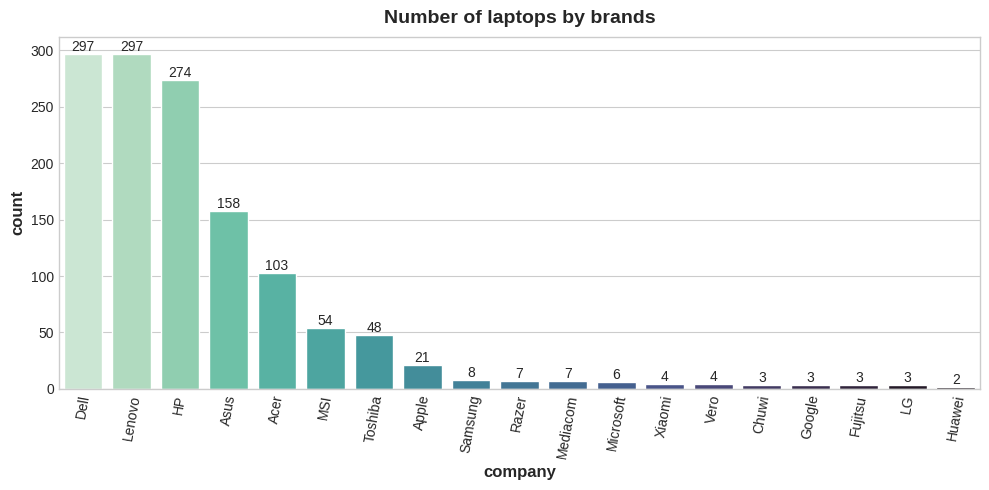

In [63]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='company', data=df, palette='mako_r', order = df['company'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by brands')
plt.show()

## What type of laptop is the most frequent?

In [64]:
df['typename'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: typename, dtype: int64

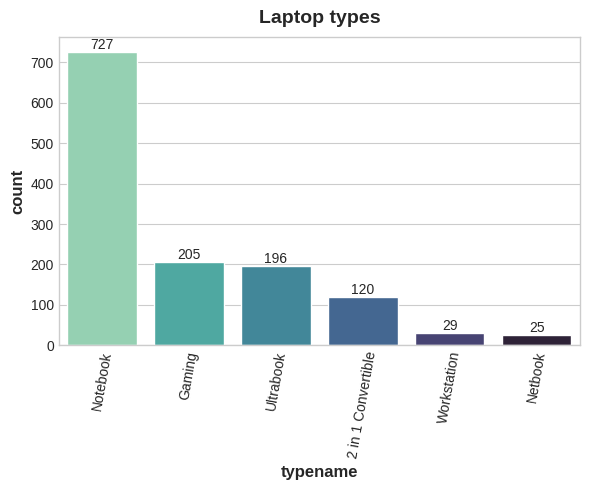

In [65]:
fig, ax = plt.subplots(figsize=(6,5))
ax=sns.countplot(x='typename', data=df, palette='mako_r', order=df['typename'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Laptop types')
plt.show()

In [66]:
print('Most laptops are notebooks, which make {:.2f}% of the total laptops'.format(len(df[df['typename']=='Notebook'])*100/len(df)))

Most laptops are notebooks, which make 55.84% of the total laptops


## Which size is the most popular?

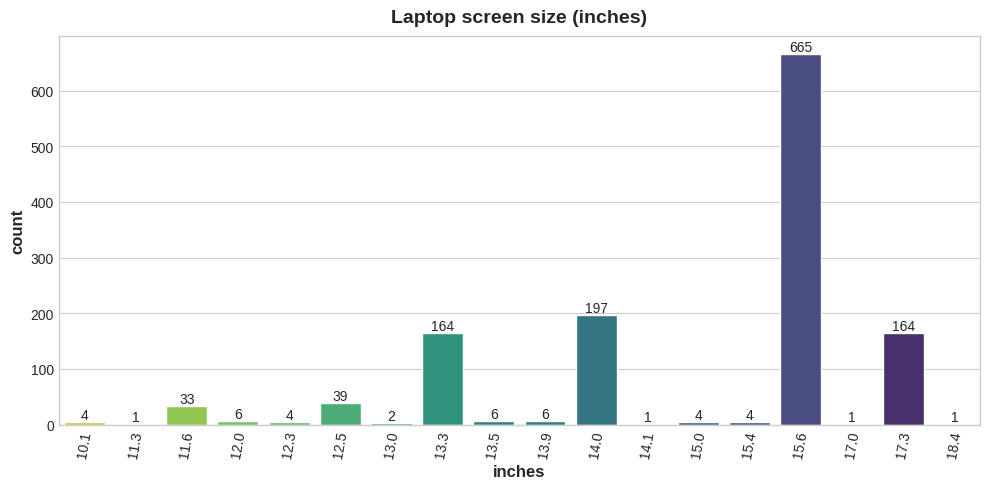

In [67]:
fig, ax = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='inches', data=df, palette='viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

In [68]:
print('Most laptops have 15.6 inches, which make {:.2f}% of the total laptops'.format(len(df[df['inches']==15.6])*100/len(df)))

Most laptops have 15.6 inches, which make 51.08% of the total laptops


In [69]:
inches_list = df['inches'].value_counts().index[:6].tolist()
inches_list

[15.6, 14.0, 13.3, 17.3, 12.5, 11.6]

In [70]:
df_clean = df_clean[df_clean['inches'].isin(inches_list)]

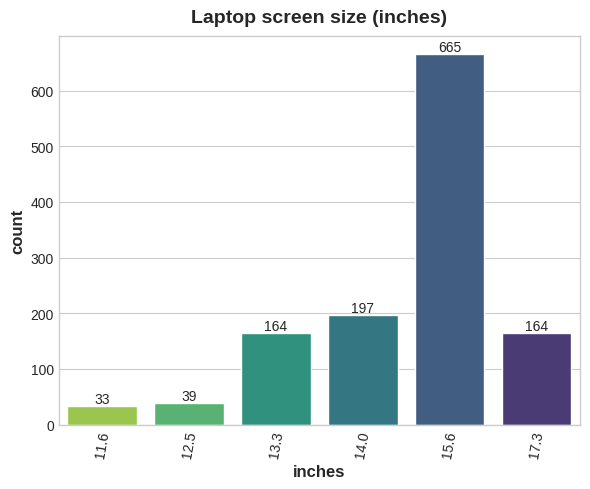

In [72]:
fig, ax = plt.subplots(figsize=(6,5))
ax=sns.countplot(x='inches', data=df_clean, palette='viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

## How is weight distributed among the laptops?

In [73]:
print('We removed {} outliers!'.format(len(df)-len(df_clean)))

We removed 40 outliers!


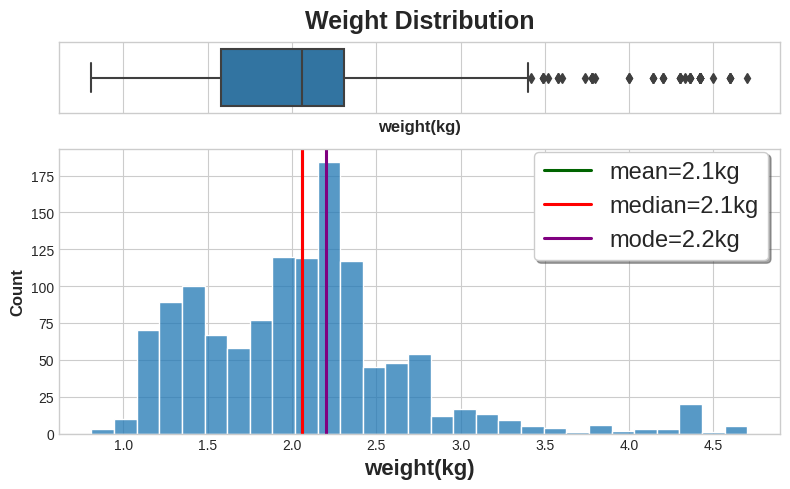

In [74]:
num_plot(df_clean, 'weight(kg)', 'Weight Distribution','kg')

## How is price distributed among the laptops?

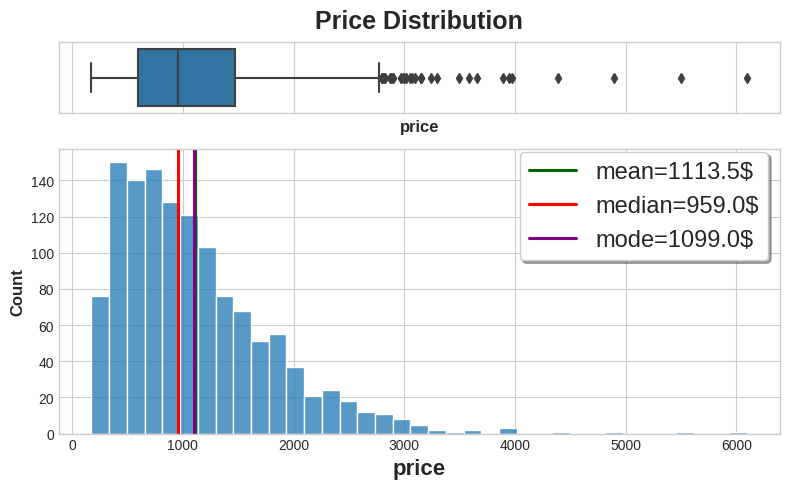

In [75]:
num_plot(df_clean, 'price', 'Price Distribution','$')

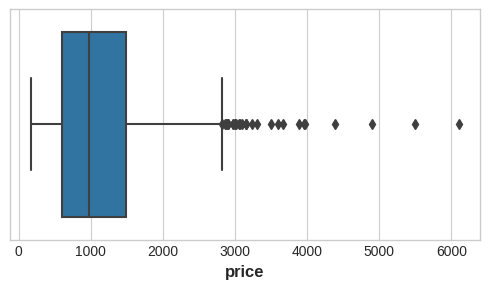

In [76]:
fig, ax = plt.subplots(figsize=(5,3))
ax=sns.boxplot(x='price', data=df)

In [77]:
df[df['price'] > 4500]

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram(GB),gpu,opsys,...,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
196,200,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK,32,Nvidia GeForce GTX 1080,Windows 10,...,3840x2160,NaN,1.0,2.9,1000.0,SSD,0.0,NaN,Intel,Nvidia
610,617,Lenovo,Thinkpad P51,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6,32,Nvidia Quadro M2200M,Windows 10,...,3840x2160,IPSPanel,0.0,3.1,1000.0,SSD,0.0,NaN,Intel,Nvidia
830,839,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK,32,Nvidia GeForce GTX 1080,Windows 10,...,3840x2160,NaN,1.0,2.9,512.0,SSD,0.0,NaN,Intel,Nvidia


In [78]:
max_price = df['price'].max()
df[df['price'] == max_price]

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram(GB),gpu,opsys,...,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
196,200,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK,32,Nvidia GeForce GTX 1080,Windows 10,...,3840x2160,NaN,1.0,2.9,1000.0,SSD,0.0,NaN,Intel,Nvidia


## How is RAM distributed among the laptops?

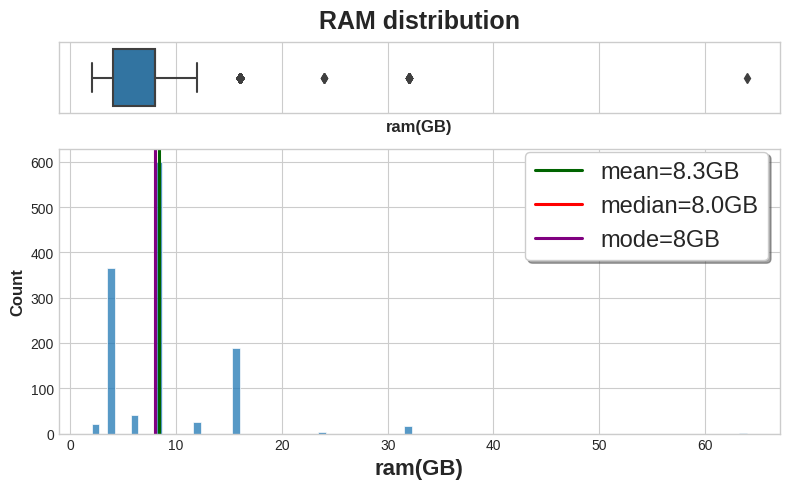

In [79]:
num_plot(df_clean, 'ram(GB)','RAM distribution','GB')

In [80]:
print('Most laptops have 8 GB RAM, which make {:.2f}% of the total laptops'.format(len(df[df['ram(GB)']==8])*100/len(df)))

Most laptops have 8 GB RAM, which make 47.54% of the total laptops


## How is CPU frequency distributed among the laptops?

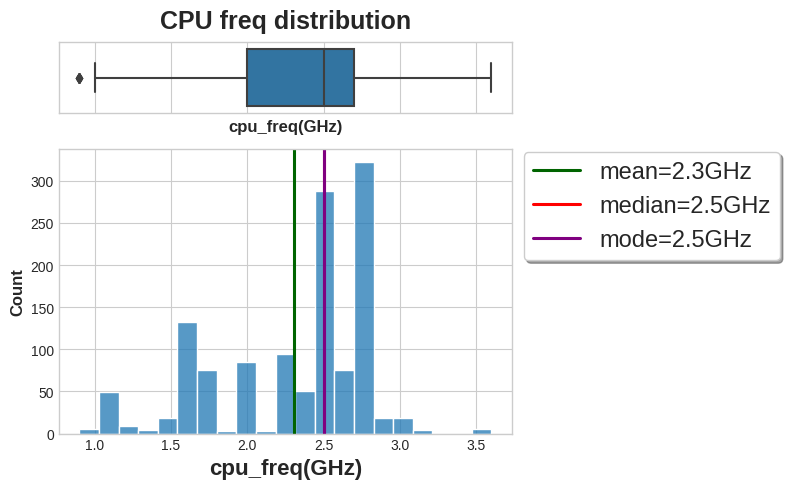

In [81]:
num_plot(df_clean, 'cpu_freq(GHz)','CPU freq distribution','GHz')

In [82]:
print('Most laptops have 2.5 GHz CPU, which make {}% of the total laptops'.format(np.round(len(df[df['cpu_freq(GHz)']==2.5])*100/len(df),2)))

Most laptops have 2.5 GHz CPU, which make 22.5% of the total laptops


## How is Hard Drive capacity distributed among the laptops?

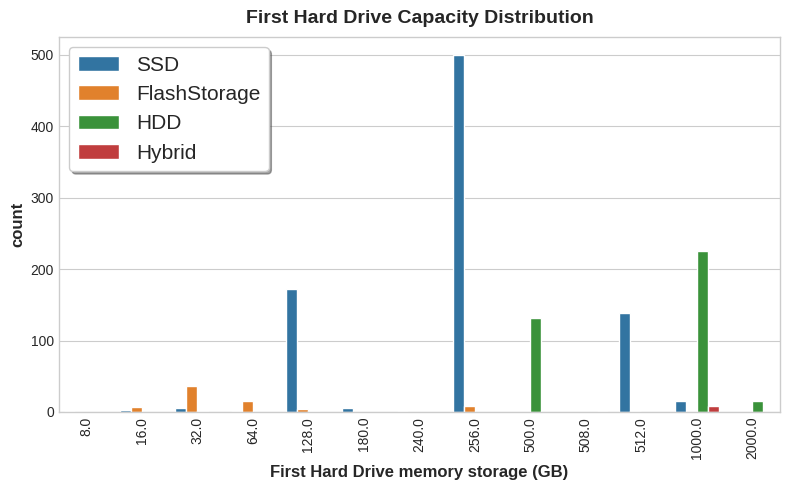

In [83]:
fig, ax  = plt.subplots(figsize=(8,5))
ax=sns.countplot(x='memory_1_sto(GB)', data=df, hue='memory_1_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('First Hard Drive memory storage (GB)')
plt.title('First Hard Drive Capacity Distribution')
plt.legend(loc='upper left', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.show()

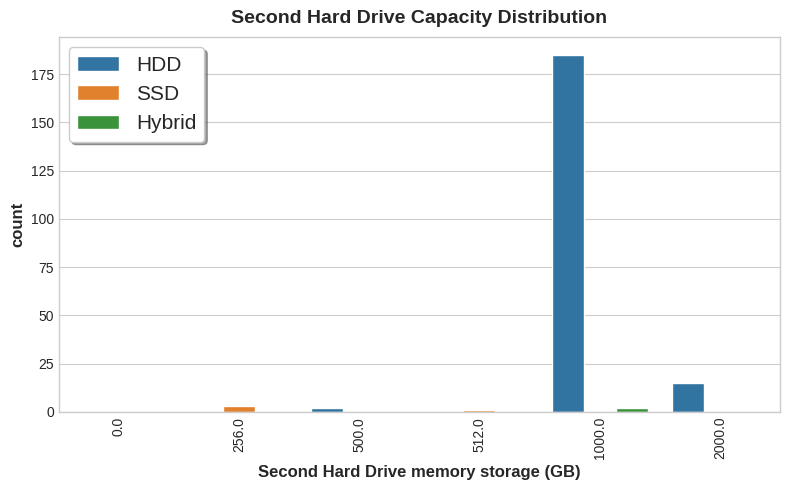

In [84]:
fig, ax  = plt.subplots(figsize=(8,5))
ax=sns.countplot(x='memory_2_sto(GB)', data=df, hue='memory_2_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Second Hard Drive memory storage (GB)')
plt.title('Second Hard Drive Capacity Distribution')
plt.legend(loc='upper left', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.show()

## Price VS CPU brand by GPU brand

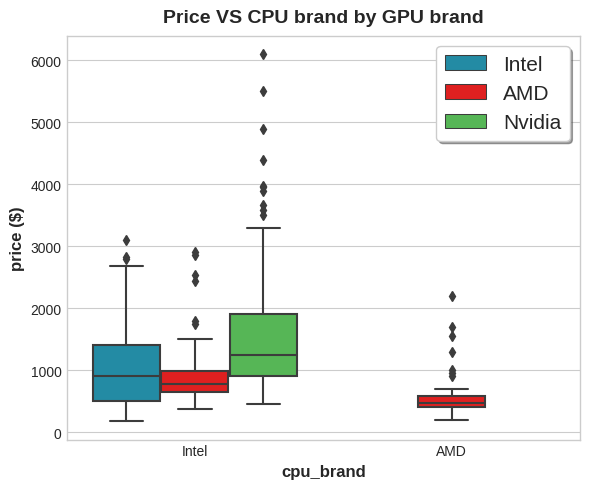

In [85]:
cpu_palette = {'Intel':'#0d98ba', 'AMD':'#FF0000', 'Nvidia':'#46C646'}
fig, ax = plt.subplots(figsize=(6,5))
sns.boxplot(x='cpu_brand', y='price', data=df, hue='gpu_brand', palette=cpu_palette)
ax.set_title('Price vs CPU brand by GPU brand')
plt.ylabel('price ($)')
plt.legend(loc='upper right', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.title('Price VS CPU brand by GPU brand')
plt.show()

Insights from this plot:

* Laptop berbasis processor Intel dan VGA Nvidia memiliki rata-rata harga tertinggi
* Laptop berbasis processor AMD dan VGA AMD memiliki rata-rata harga terendah
* Laptop berbasis processor Intel dan VGA Nvidia termasuk pengguna terbanyak karena memeiliki rata-rata harga tertinggi dibandingkan varian lainnya.

## Which are the TOP 15 most common GPUs?

In [86]:
gpu_list = df_clean['gpu'].value_counts()[:15].index.tolist()

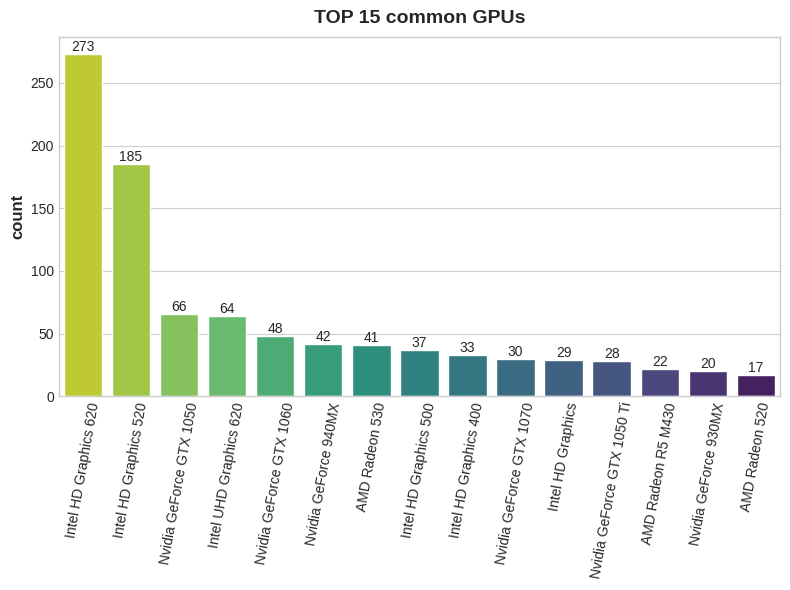

In [87]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='gpu', data=df_clean[df_clean['gpu'].isin(gpu_list)], order = gpu_list, palette='viridis_r')
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common GPUs')
plt.xlabel('')
plt.show()

## Which are the TOP 15 most common CPUs?

In [88]:
cpu_list = df_clean['cpu'].value_counts()[:15].index.tolist()

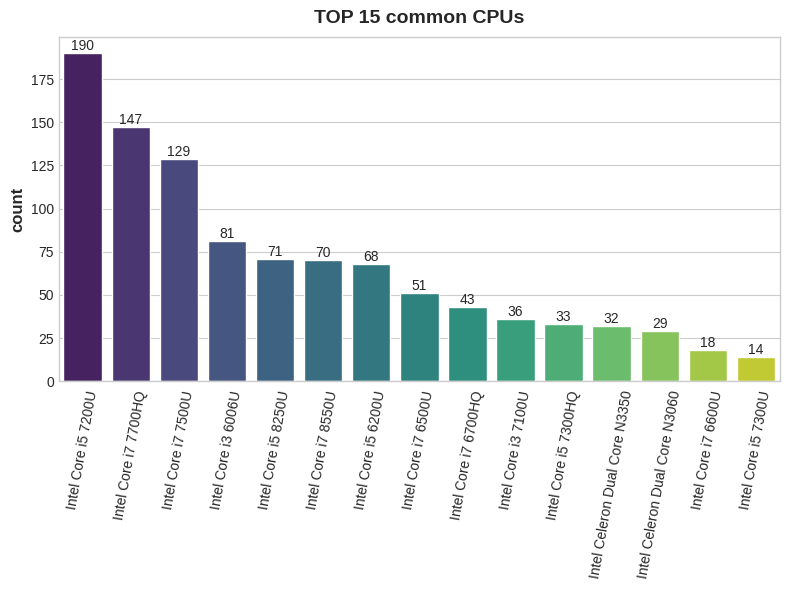

In [89]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='cpu', data=df_clean[df_clean['cpu'].isin(cpu_list)], order = cpu_list, palette='viridis')
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common CPUs')
plt.xlabel('')
plt.show()

## What is the average price of laptops by company?

In [90]:
company_list = df['company'].value_counts().index[:8].tolist()
company_list

['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple']

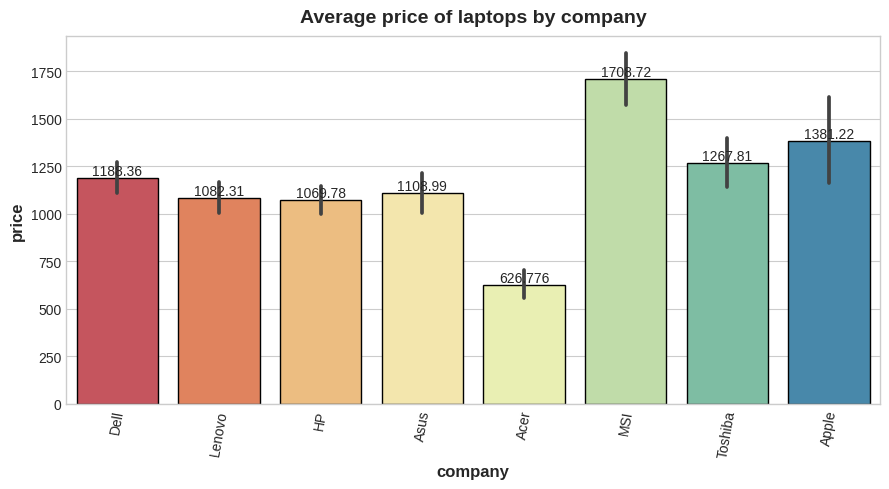

In [91]:
plt.figure(figsize=(9,5))
ax=sns.barplot(x='company', y='price', data=df_clean[df_clean['company'].isin(company_list)],
                order=company_list,
                palette='Spectral',
                #ci=False,
                edgecolor="black")
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Average price of laptops by company')
plt.show();

Insights:
* Rata-rata Harga Tertinggi pada Brand MSI karena peminatnya terbanyak dibandingkan varian lainnya.
* Rata-rata harga Terendah pada Brand Acer
